In [3]:
import numpy as np
import scipy.stats as ss
import seaborn as sns

### 假设检验

In [4]:
# 20个符合正态分布的值
norm_dist = ss.norm.rvs(size=20)
norm_dist

array([ 0.75295476,  1.23743465,  1.22311872,  1.03186398,  0.02225342,
       -1.5607541 ,  0.01890839, -1.56292672, -1.12690071, -0.13936368,
        0.51524727,  1.21290744,  1.52412826,  0.67158692, -0.12853659,
       -0.07320661,  0.68413995, -1.07913583,  0.34829248, -0.25102207])

In [5]:
# 检验是否符合正态分布
ss.normaltest(norm_dist)

NormaltestResult(statistic=1.4377483819665124, pvalue=0.4873005546205281)

In [6]:
# t分布检验
ss.ttest_ind(ss.norm.rvs(size=10), ss.norm.rvs(size=20))

Ttest_indResult(statistic=-1.5743362836198633, pvalue=0.1266426208728476)

检验统计量和P值。P值大于0.05, 也就是可以说假设成立，两分布均值没有差别

In [7]:
# 卡方检验
ss.chi2_contingency([[15, 95], [85, 5]])

(126.08080808080808, 2.9521414005078985e-29, 1, array([[55., 55.],
        [45., 45.]]))

In [9]:
# f检验
ss.f_oneway([49, 50, 39, 40, 43],[28, 32, 30, 26, 34],[38, 40, 45, 42, 48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

In [10]:
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt

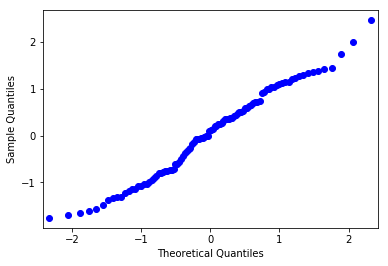

In [11]:
# 图检验是否符合正态分布
plt.show(qqplot(ss.norm.rvs(size=100)))

### 相关系数

In [7]:
import pandas as pd
s1 = pd.Series([0.1, 0.2, 1.1, 2.4, 1.3, 0.3, 0.5])
s2 = pd.Series([0.5, 0.4, 1.2, 2.5, 1.1, 0.7, 0.1])
# 对Seres求相关系数
s1.corr(s2)

0.9333729600465923

In [14]:
# 斯皮尔曼相关系数
s1.corr(s2, method='spearman')

0.7142857142857144

In [16]:
# 对df求相关系数，因为对列处理，所以要转置
df=pd.DataFrame(np.array([s1,s2]).T)
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [17]:
df.corr(method='spearman')

,0,1
0,1.000000,0.714286
1,0.714286,1.000000


In [18]:
# 对于回归问题
x=np.arange(10).astype(np.float).reshape((10, 1))
y=x*3+np.random.random((10, 1))

In [19]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [20]:
y

array([[ 0.38241749],
       [ 3.02216578],
       [ 6.03322823],
       [ 9.66856137],
       [12.9455134 ],
       [15.8189476 ],
       [18.94890963],
       [21.33221138],
       [24.67287576],
       [27.70559378]])

In [21]:
from sklearn.linear_model import LinearRegression
# 线性回归器
reg = LinearRegression()
# 对数据拟合
res=reg.fit(x,y)
# 产生预测值
y_pred=reg.predict(x)
y_pred

array([[ 0.28923468],
       [ 3.34785863],
       [ 6.40648258],
       [ 9.46510652],
       [12.52373047],
       [15.58235441],
       [18.64097836],
       [21.69960231],
       [24.75822625],
       [27.8168502 ]])

In [22]:
# 参数
reg.coef_

array([[3.05862395]])

In [23]:
# 截距
reg.intercept_

array([0.28923468])

### PCA变换

In [4]:
data=np.array([np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2,   1,  1.5, 1.1]), 
               np.array([2.4, 0.7, 2.9, 2.2,  3,  2.7, 1.6, 1.1, 1.6, 0.9])]).T

In [5]:
from sklearn.decomposition import PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
lower_dim.explained_variance_ratio_

array([0.96318131])

降维后留下0.96信息量

In [28]:
# 降维之后的数据
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

#### sk-learn中PCA算法用到是奇异值分解

### 自己实现一个PCA方法

In [29]:
def myPCA(data, n_components=1000000):  # 默认取所有维度
    # data中针对列计算均值
    mean_vals = np.mean(data, axis=0)
    # 每列分别减去均值
    mid = data - mean_vals
    # 求协方差 np.cov， rowvar=False针对列
    cov_mat = np.cov(mid, rowvar=False)
    from scipy import linalg # 线性计算
    # 求协方差矩阵的特征值 和 特征向量
    eig_vals, eig_vects = linalg.eig(np.mat(cov_mat))
    # np.argsort得到排序后的索引
    eig_val_index = np.argsort(eig_vals)
    # 取最大索引
    eig_val_index = eig_val_index[:-(n_components+1):-1]
    # 取特征向量
    eig_vects = eig_vects[:, eig_val_index]
    # 转换后的特征
    low_dim_mat = np.dot(mid, eig_vects)
    return low_dim_mat, eig_vals
print(myPCA(data, n_components=1))

(array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]]), array([0.0490834 +0.j, 1.28402771+0.j]))


结果一致，哦耶！

### 基于HR.csv数据做主成分分析

In [8]:
# HR.bak.csv是清洗过后的数据
df = pd.read_csv('HR.bak.csv')
my_pca = PCA(n_components=7)
lower_mat = my_pca.fit_transform(df.drop(labels=['salary','department','left'], axis=1))
my_pca.explained_variance_ratio_

array([9.98565340e-01, 8.69246970e-04, 4.73865973e-04, 4.96932182e-05,
       2.43172315e-05, 9.29496619e-06, 8.24128218e-06])

得出相关系数，比较后，只留下salary一列即可

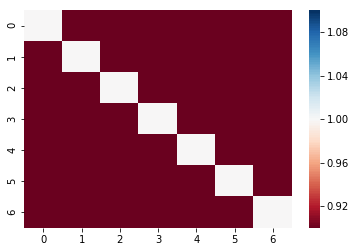

In [11]:
sns.heatmap(pd.DataFrame(lower_mat).corr(), vmin=1, vmax=1, cmap=sns.color_palette('RdBu', n_colors=128))

### 交叉分析

In [31]:
# indices获得索引
df_indices = df.groupby(by='department').indices
sales_values = df['left'].iloc[df_indices['sales']].values
technical_values = df['left'].iloc[df_indices['technical']].values
# t分布校验
print(ss.ttest_ind(sales_values, technical_values))

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)


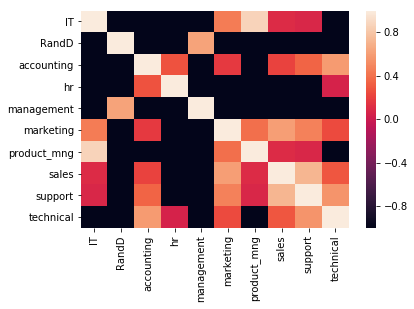

In [38]:
df_keys = list(df_indices.keys())
# 初始化一个为0的矩阵
df_t_mat = np.zeros([len(df_keys), len(df_keys)])
for i in range(len(df_keys)):
    for j in range(len(df_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[df_indices[df_keys[i]]].values, 
                               df['left'].iloc[df_indices[df_keys[j]]].values)[1]
        # 这样做图颜色对比更明显
        if p_value < 0.05:
            df_t_mat[i][j]=-1
        else:
            df_t_mat[i][j] = p_value
sns.heatmap(df_t_mat, xticklabels=df_keys, yticklabels=df_keys)
plt.show()

所有黑色部分可以认为部门之间离职率是有显著差异的，例如IT部门和technical部门

In [39]:
# 透视表是另一种交叉分析方法
piv_tb = pd.pivot_table(df, values='left', index=['promotion_last_5years', 'salary'],
                       columns=['Work_accident'], aggfunc=np.mean)
piv_tb

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

可以得出0.331728的值比较高，过去5年没有晋升，工资比较低，没有事故，这样的人离职率高。

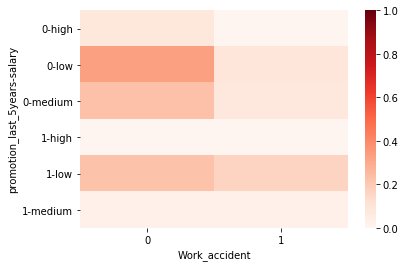

In [45]:
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds', n_colors=256))
sns.set_context(font_scale=1.5)
plt.show()

### 分组分析

/home/f/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


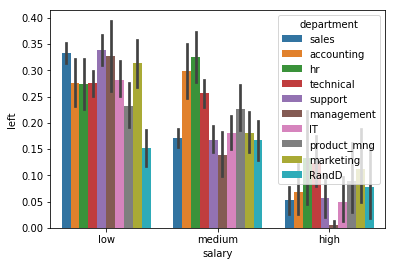

In [46]:
sns.barplot(x='salary', y='left', hue='department', data=df)
plt.show()

可以看出图中两个拐点，可以以此进行分析

### 相关分析(除相关系数外，熵也是一个很重要的因素)